# Principle Component Analysis

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# load the digits dataset from scikit learn
digits = load_digits()
# show the shape of data set (rows x columns)
digits.data.shape


(1797, 64)

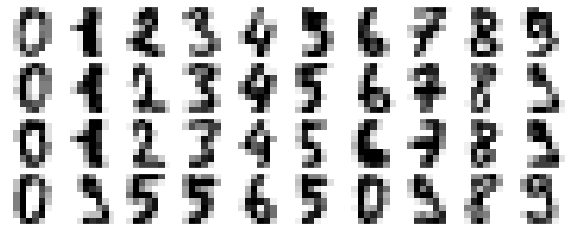

In [2]:
# helper function to print the digits to screen
def plot_digits(data):
	fig, axes = plt.subplots(4, 10, figsize=(10, 4),
							 subplot_kw={'xticks':[], 'yticks':[]},
							 gridspec_kw=dict(hspace=0.1, wspace=0.1))
	for i, ax in enumerate(axes.flat):
		ax.imshow(data[i].reshape(8, 8),
			  cmap='binary', interpolation='nearest',
			  clim=(0, 16))

# print to screen
plot_digits(digits.data)

Original size = (1797, 64)
New size = (1797, 2)


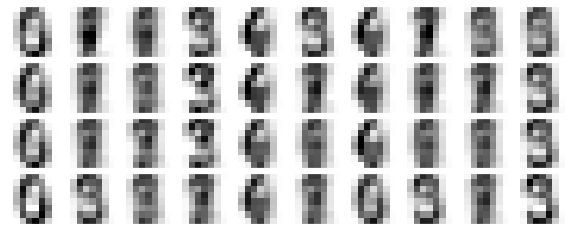

In [3]:
# function to perform PCA - takes a datset and a value for k
# where k = the # of components
def projector(data, k):
	# define the PCA model 
	pca = PCA(k)
	# create a PCA transform
	projected = pca.fit_transform(data.data)
	# print the old size and the new size
	print("Original size = " + str(data.data.shape))
	print("New size = " + str(projected.shape))
	# create a transformed dataset based on the transform
	components = pca.fit_transform(data.data)
	# reshape the transform back to the original space
	reshaped = pca.inverse_transform(components)
	# return this object
	return reshaped

# run and print a projection based on 2 components
projected = projector(digits, 2)
plot_digits(projected)

Original size = (1797, 64)
New size = (1797, 32)


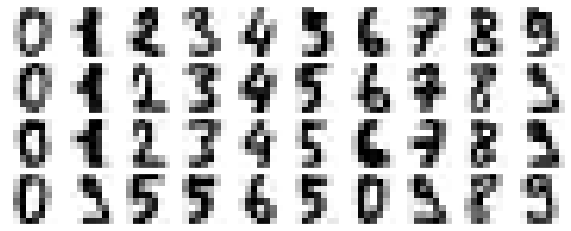

In [4]:
# run and print a projection based on 2 components
projected = projector(digits, 32)
plot_digits(projected)

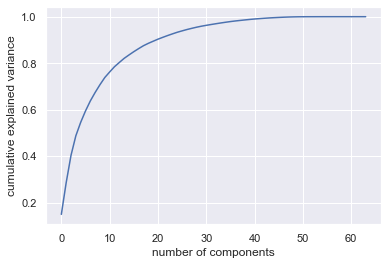

In [5]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');